### Global Fitting for Ligand Binding with Background Differential Evolution using symfit

### This ipython notebook code fits data for ligand binding using radioactive measurements by global fitting using Differential Evolution algorithm, which does not require initial guess like least squares method. The fits use global fitting to extract Bmax, Kd and ns (non specific binding). The fits are reported with standard deviation for each parameter and R2 for the model fit. 

### You will need to install symfit library https://pypi.org/project/symfit/

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from symfit import parameters, variables, Model, Fit
from symfit.core.minimizers import DifferentialEvolution


Parameter Value        Standard Deviation
Bmax      9.970953e+00 1.895433e-01
Kd        7.973567e+00 5.482094e-01
NS        2.872826e-02 4.733994e-04
Status message         Optimization terminated successfully.
Number of iterations   48
Objective              <symfit.core.objectives.LeastSquares object at 0x000001FD7D73ADC8>
Minimizer              <symfit.core.minimizers.DifferentialEvolution object at 0x000001FD7D73ACC8>

Goodness of fit qualifiers:
chi_squared            0.6801556445796364
objective_value        0.3400778222898182
r_squared              0.9985659267517779

Bmax is 10.0 +/- 0.2
Kd is 8.0 +/- 0.5


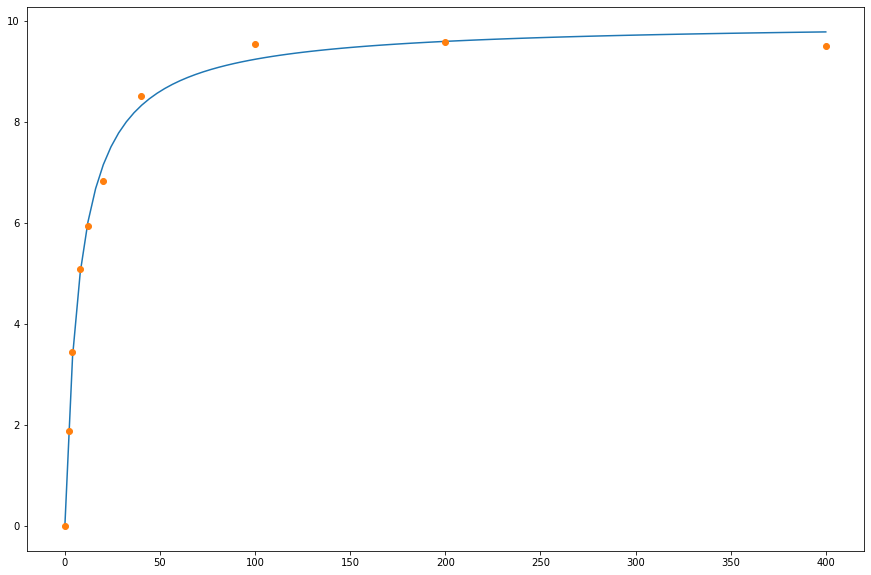

In [8]:
#Ligand Binding Equation
def Ligand_Binding(x, Kd, Bmax):
    return (Bmax*x)/(Kd+x)

#Define variables and parameters
x_1, x_2, y_1, y_2 = variables('x_1, x_2, y_1, y_2')
Bmax, Kd, NS = parameters('Bmax, Kd, NS')

#Bounds for Differential Evolution
Bmax.min, Bmax.max = (0, 10)
Kd.min, Kd.max = (0, 10)
NS.min, NS.max = (0, 10)

#Global fit of ligand binding with background
model = Model({
    y_1: (Bmax*x_1)/(Kd+x_1) + NS*x_1,
    y_2: NS*x_2,
})

#Raw Data
x_1 = np.array([0, 2, 4, 8, 12, 20, 40, 100, 200, 400])
x_2 = np.array([0, 12, 40, 200, 400])    
y_1 = np.array([0, 1.93, 3.55, 5.32, 6.29, 7.41, 9.65, 12.40, 15.33, 20.98])
y_2 = np.array([0, 0.27, 0.93, 6.29, 11.44])

#Fitting the Data
fit = Fit(model, x_1, x_2, y_1, y_2, minimizer=DifferentialEvolution)
fit_result = fit.execute()
print (fit_result)

#Extracting parameters
Bmax_Fit = fit_result.value(Bmax)
Kd_Fit = fit_result.value(Kd)
NS_Fit = fit_result.value(NS)

#Plotting the Data
x = np.linspace(min(x_1), max(x_1), 100)
yn = Ligand_Binding(x, Kd_Fit, Bmax_Fit)
y_1s = y_1-(NS_Fit*x_1)    #subtract background
plt.figure(figsize=(15,10))
fit_data = plt.plot(x, yn)
raw_data = plt.plot(x_1, y_1s, 'o')

#Print the results
print ("")
print("Bmax is", round(fit_result.value(Bmax),1), "+/-",round(fit_result.stdev(Bmax),1))
print("Kd is", round(fit_result.value(Kd),1), "+/-", round(fit_result.stdev(Kd),1))